<a href="https://colab.research.google.com/github/jahidhassanbd/ML-Basic-Coding/blob/main/Predictive_Maintanance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the google drive to acces my dataset from the drive folder

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Essantial Library for data test train , data visualization and data read

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Using the pandas read the csv dataset from the google drive

In [12]:
pmd = pd.read_csv('/content/drive/MyDrive/Dataset/predictive_maintenance_dataset.csv', header = 0)

In [13]:
print("Length of the dataset:" , len (pmd))

Length of the dataset: 124494


Showing the  rows and column number from the dataset

In [14]:
print("Dataset Shape:", pmd.shape)

Dataset Shape: (124494, 12)


Drscribe the every column mean, meadian , count and many more

In [15]:
print(pmd.describe())

             failure       metric1        metric2        metric3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.492706       9.940897   
std         0.029167  7.045933e+07    2179.677781     185.748131   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128476e+07       0.000000       0.000000   
50%         0.000000  1.227974e+08       0.000000       0.000000   
75%         0.000000  1.833096e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

             metric4        metric5        metric6        metric7  \
count  124494.000000  124494.000000  124494.000000  124494.000000   
mean        1.741120      14.222669  260172.657726       0.292528   
std        22.908507      15.943028   99151.078547       7.436924   
min         0.000000       1.000000       8.000000       0.000000   
25%         0.000000       8.000000  22145

Checking for any Null or missing value in the dataset

In [16]:
print('Missing Values:')
print(pmd.isnull().sum())

Missing Values:
date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


Showing histogram of all feature along with the target attribute

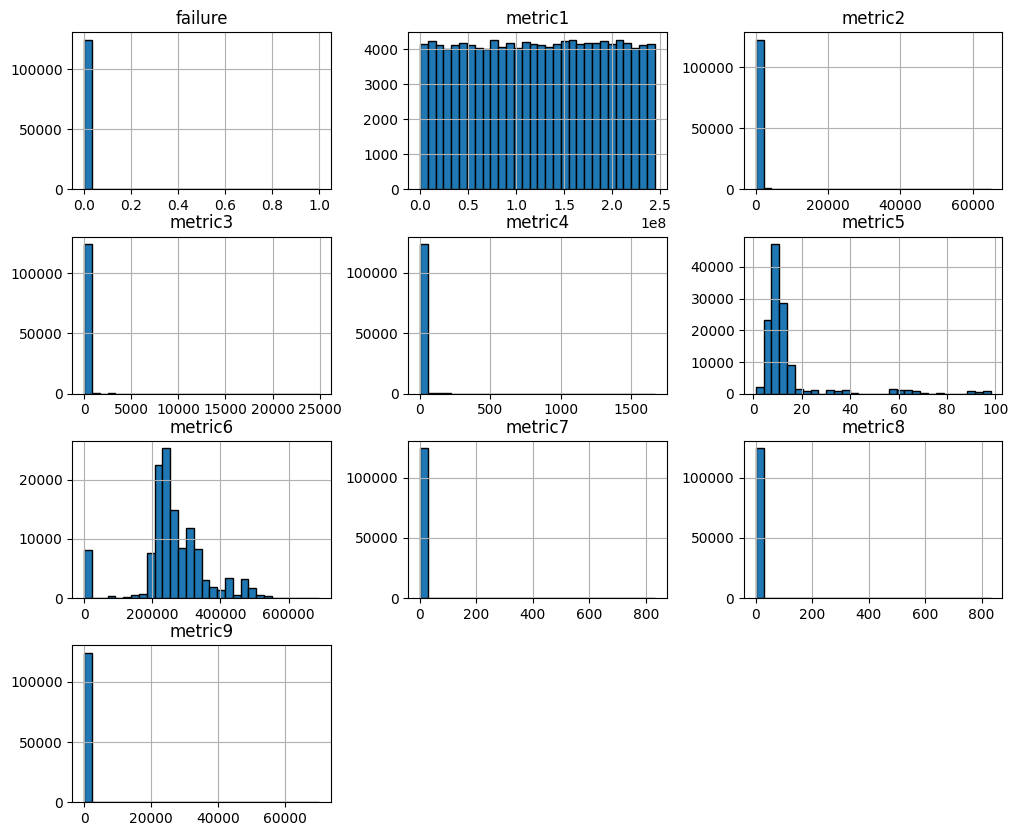

In [17]:
pmd.hist(figsize = (12, 10), bins = 30, edgecolor='black')
plt.show()

Pair wise ploting

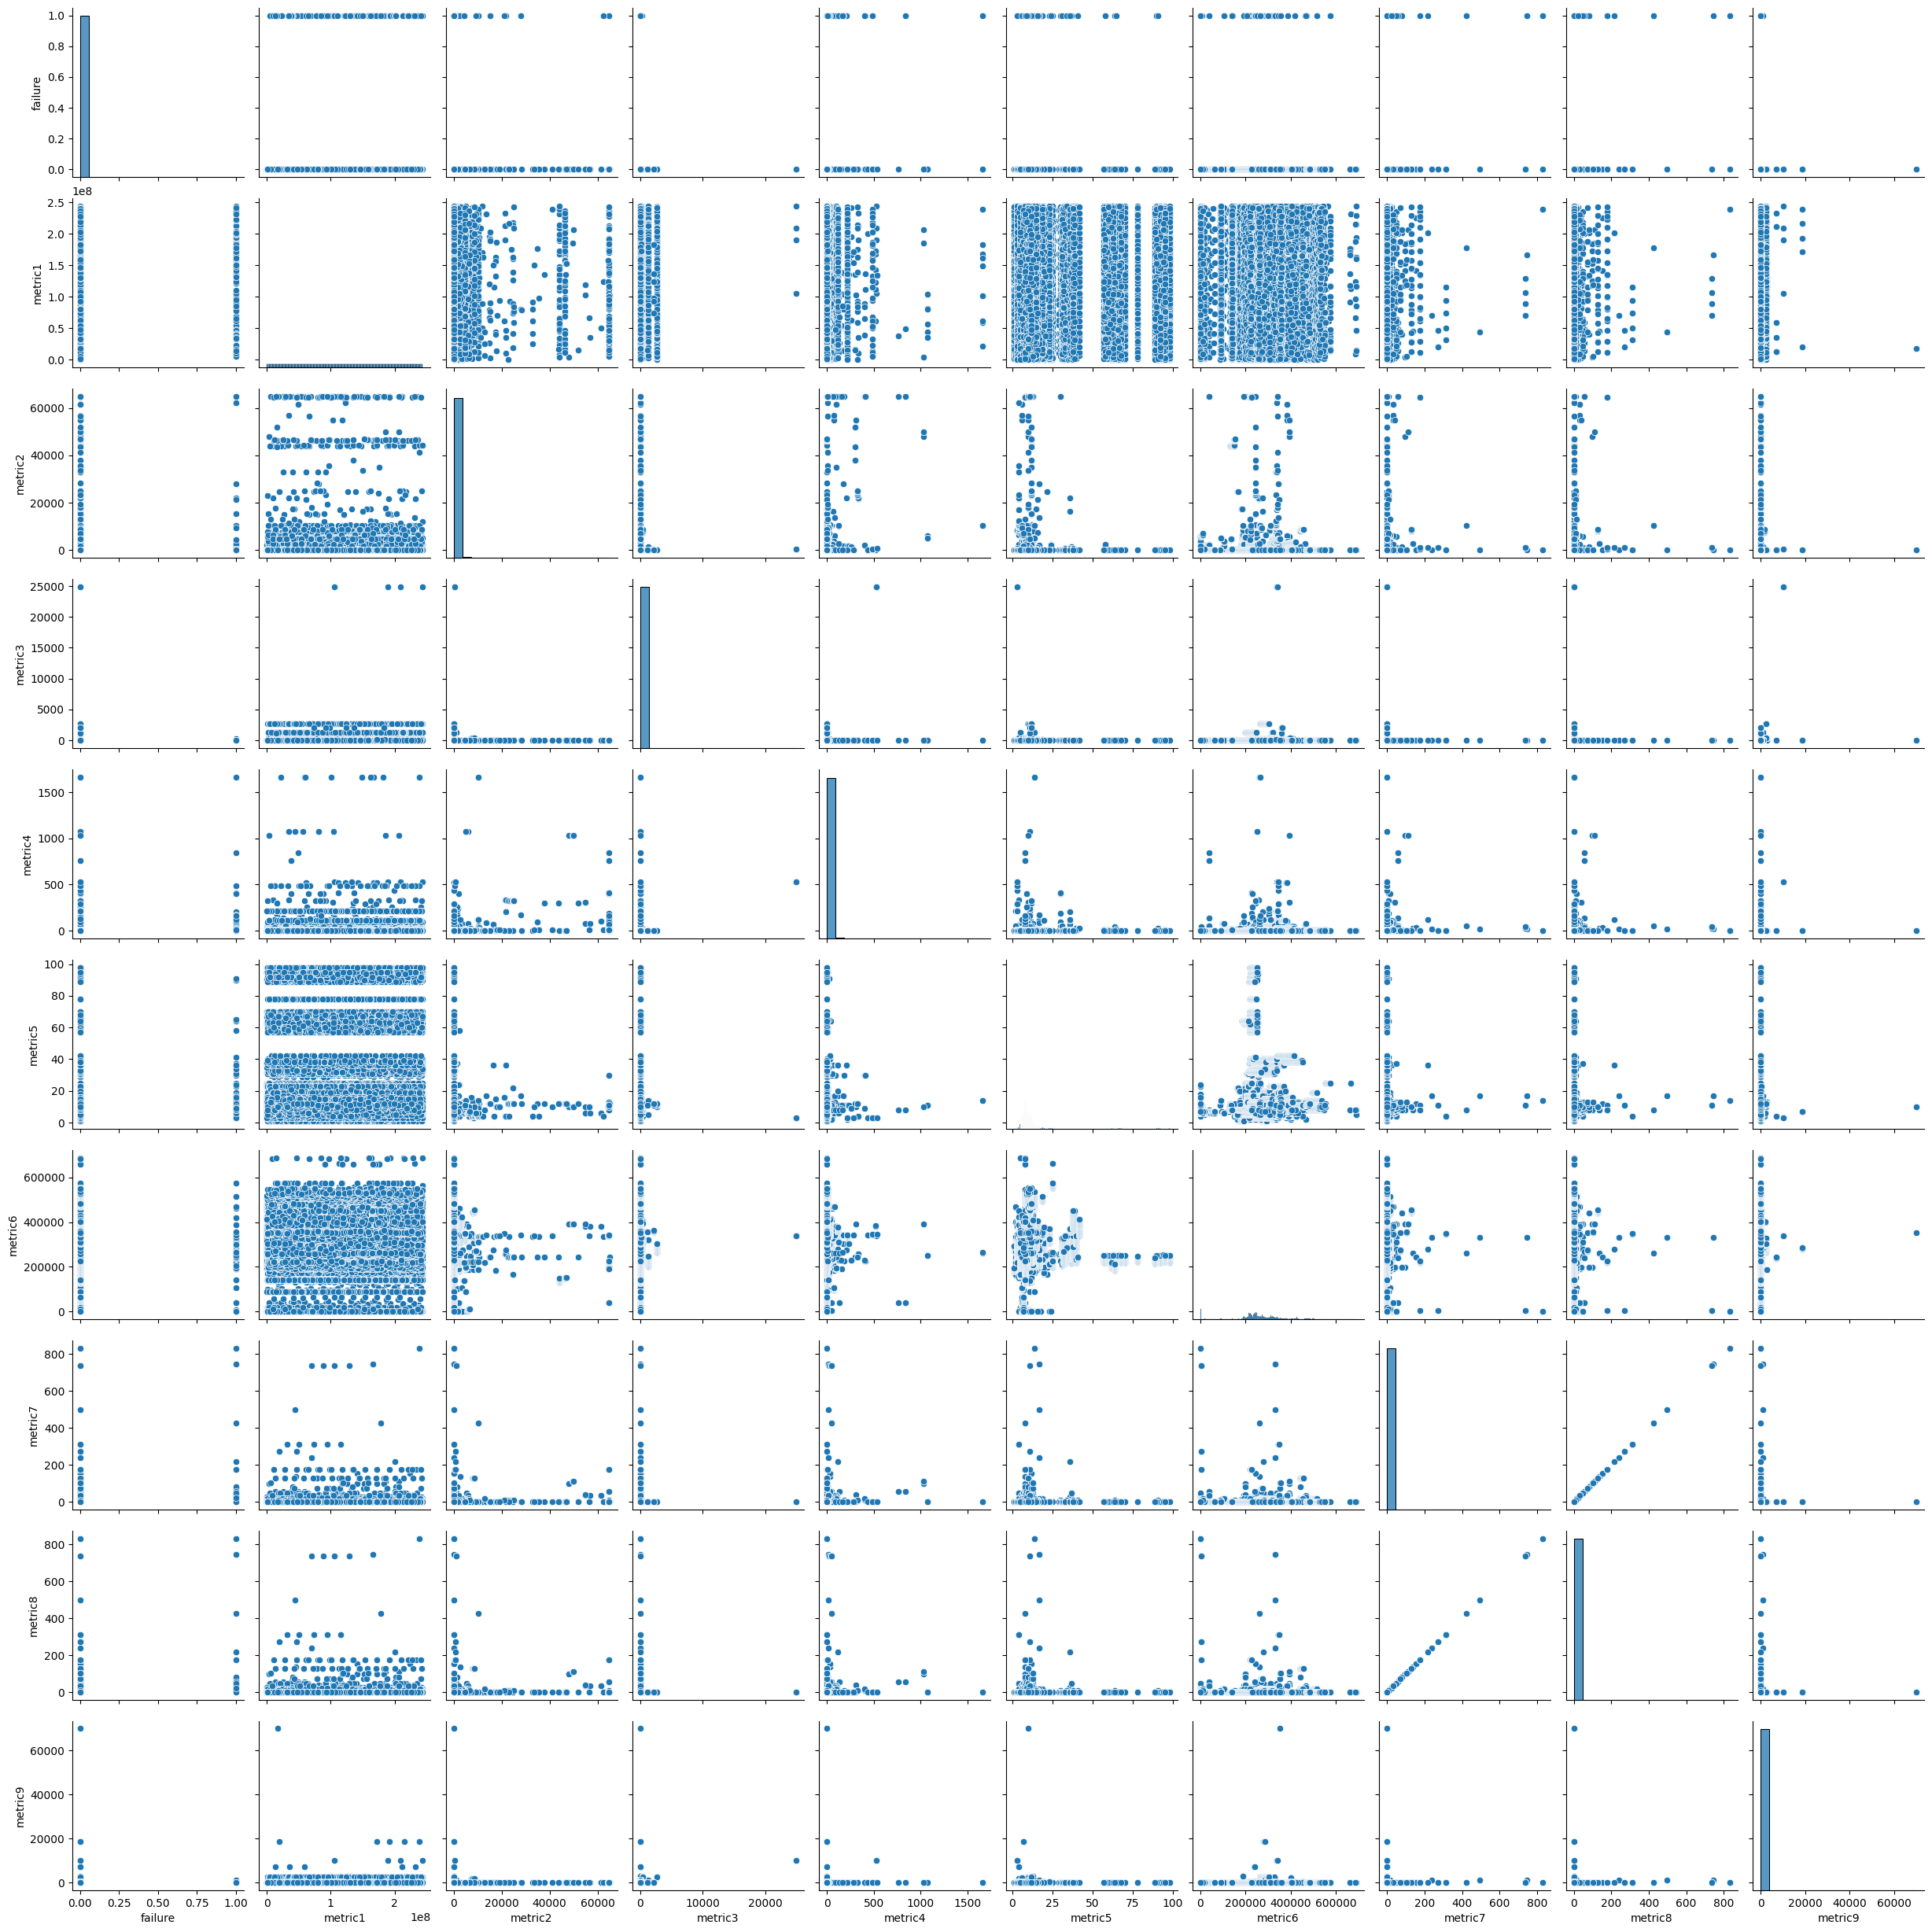

In [18]:
sns.pairplot(pmd)
plt.show()

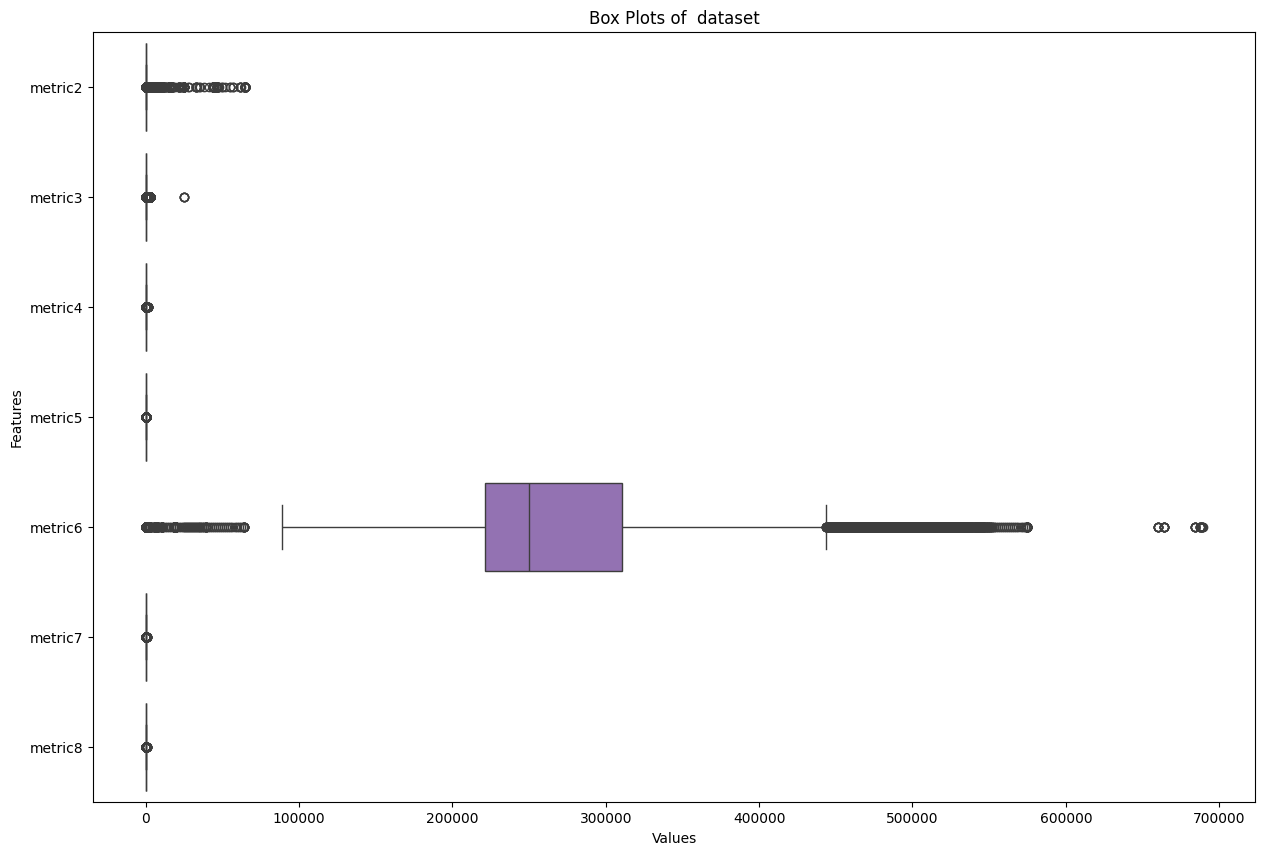

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=pmd[['metric2','metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8']], orient='h')
plt.title('Box Plots of  dataset')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

<Figure size 1500x1000 with 0 Axes>

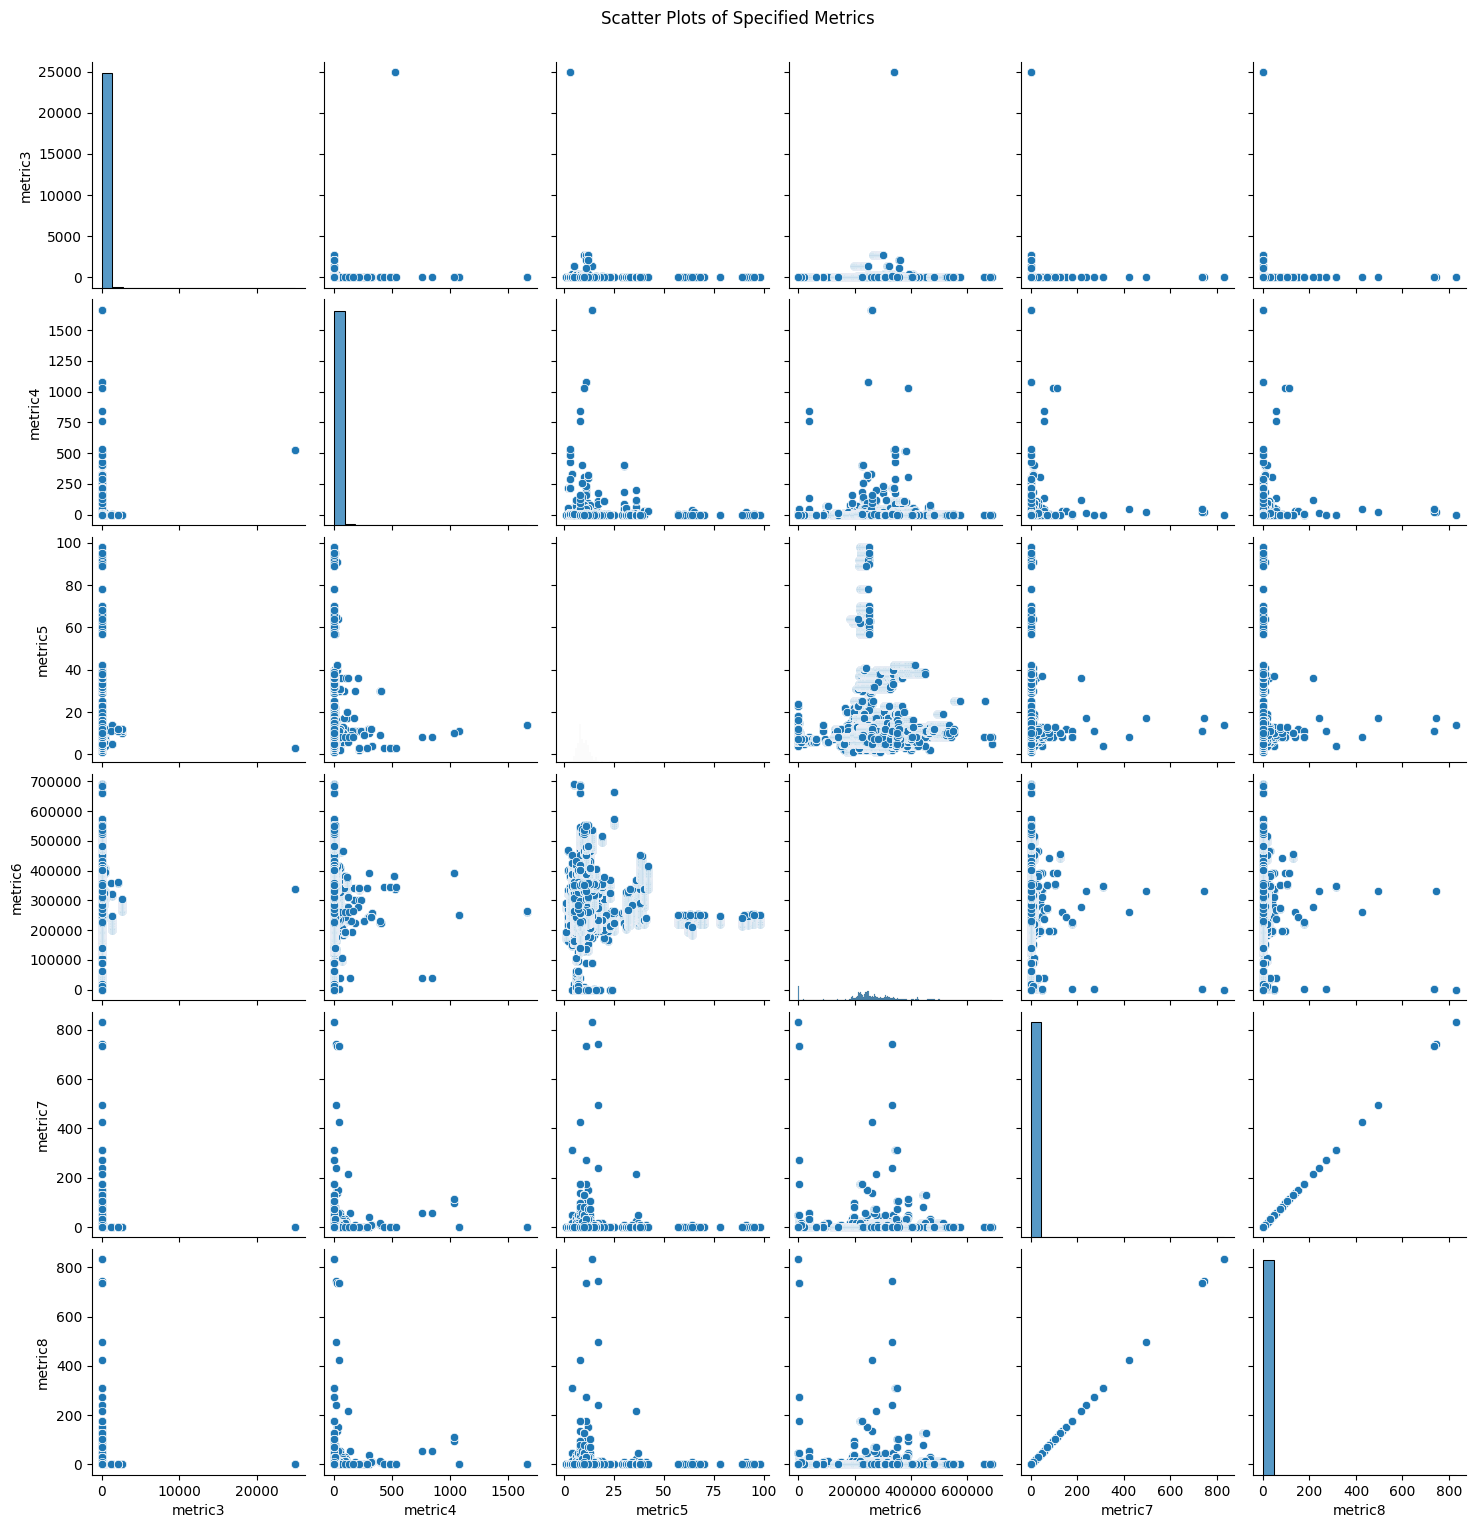

In [20]:
plt.figure(figsize=(15, 10))
sns.pairplot(pmd[['metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8']])
plt.suptitle('Scatter Plots of Specified Metrics', y=1.02)
plt.show()

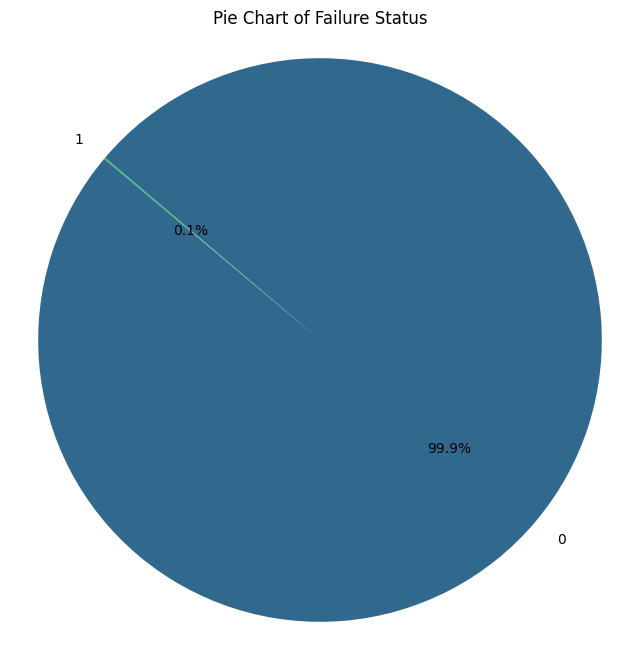

In [21]:
failure_counts = pmd['failure'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(failure_counts)))
plt.title('Pie Chart of Failure Status')
plt.axis('equal')
plt.show()

For Failure, target attributes find the correlation with different metrics using pointbiserialr co relation technic

In [22]:
from scipy.stats import pointbiserialr

pb_correlation_results = {}
for column in pmd.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'failure':
        correlation, p_value = pointbiserialr(pmd['failure'], pmd[column])
        pb_correlation_results[column] = correlation


Point Biserial Correlation:    rXY = rpb

Print the correlation values for different metrics

In [23]:
print(pb_correlation_results)

{'metric1': 0.001983484281090132, 'metric2': 0.052900986896552524, 'metric3': -0.0009484954823373644, 'metric4': 0.06739847485574327, 'metric5': 0.0022697308795809382, 'metric6': -0.0005503238387569538, 'metric7': 0.11905458506082814, 'metric8': 0.11905458506082814, 'metric9': 0.001066509776812146}


In [24]:
pmd.drop('date', axis=1, inplace=True)

In [25]:
pmd = pd.get_dummies(pmd, columns=['device'])

In [26]:
X = pmd.drop('failure', axis=1)
y = pmd['failure']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 88, number of negative: 99507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2511
[LightGBM] [Info] Number of data points in the train set: 99595, number of used features: 751
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000884 -> initscore=-7.030646
[LightGBM] [Info] Start training from score -7.030646


LGBMClassifier(random_state=42)

In [29]:
lgb_y_pred = lgb_clf.predict(X_test)

In [30]:
print("LightGBM Classifier:")
print("Accuracy:", accuracy_score(y_test, lgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_y_pred))
print("Classification Report:\n", classification_report(y_test, lgb_y_pred))


LightGBM Classifier:
Accuracy: 0.9989959436121932
Confusion Matrix:
 [[24873     8]
 [   17     1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.11      0.06      0.07        18

    accuracy                           1.00     24899
   macro avg       0.56      0.53      0.54     24899
weighted avg       1.00      1.00      1.00     24899



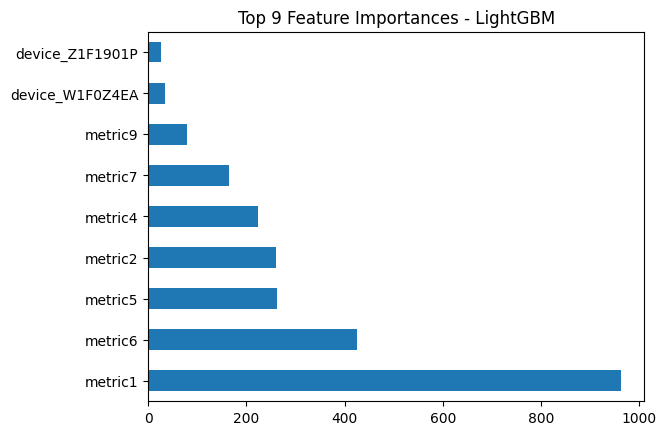

In [31]:
feature_importances_lgb = pd.Series(lgb_clf.feature_importances_, index=X.columns)
feature_importances_lgb.nlargest(9).plot(kind='barh')
plt.title('Top 9 Feature Importances - LightGBM')
plt.show()

In [32]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [33]:
xgb_y_pred = xgb_clf.predict(X_test)

In [34]:
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("Classification Report:\n", classification_report(y_test, xgb_y_pred))



XGBoost Classifier:
Accuracy: 0.9990762681232178
Confusion Matrix:
 [[24876     5]
 [   18     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899



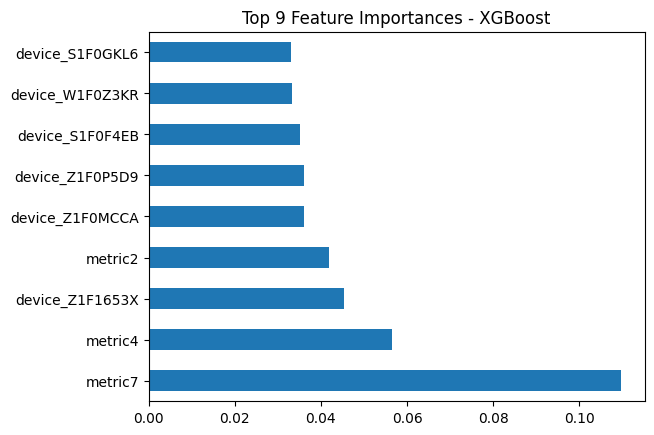

In [35]:
feature_importances_xgb = pd.Series(xgb_clf.feature_importances_, index=X.columns)
feature_importances_xgb.nlargest(9).plot(kind='barh')
plt.title('Top 9 Feature Importances - XGBoost')
plt.show()

In [36]:
!pip install catboost
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat_clf.fit(X_train, y_train)

In [37]:
cat_y_pred = cat_clf.predict(X_test)

In [38]:
print("\nCatBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, cat_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, cat_y_pred))
print("Classification Report:\n", classification_report(y_test, cat_y_pred))


CatBoost Classifier:
Accuracy: 0.9991565926342424
Confusion Matrix:
 [[24877     4]
 [   17     1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.20      0.06      0.09        18

    accuracy                           1.00     24899
   macro avg       0.60      0.53      0.54     24899
weighted avg       1.00      1.00      1.00     24899



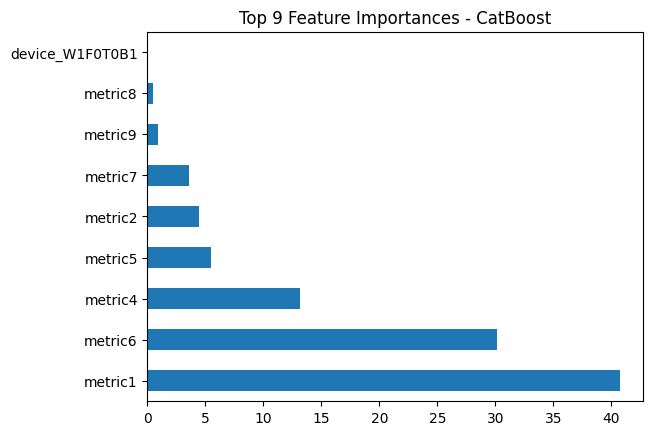

In [39]:
feature_importances_cat = pd.Series(cat_clf.feature_importances_, index=X.columns)
feature_importances_cat.nlargest(9).plot(kind='barh')
plt.title('Top 9 Feature Importances - CatBoost')
plt.show()